#**Applied Forecasting Methods Project [IT 402]**
202203002 - Mehta Mit Mitesh

202201254 - Vasa Saumya Kalpesh

202201035 - Harsh Gopalbhai Vashiyar

##**A. Importing Libraries**

In [1]:
!pip install --quiet pmdarima
!pip install --quiet statsmodels
!pip install statsmodels plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib as lib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import gc

##**B. Describing and Organizing the Data sets for using:**

###**Importing data sets:**

In [4]:
sales_data= pd.read_csv('/content/NIFTY IND DIGITAL_minute_data_AFM.csv')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227246 entries, 0 to 227245
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    227246 non-null  object 
 1   open    227246 non-null  float64
 2   high    227246 non-null  float64
 3   low     227246 non-null  float64
 4   close   227246 non-null  float64
 5   volume  227246 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 10.4+ MB


In [5]:
sales_data.head()

,date,open,high,low,close,volume
0,2022-08-29 09:15:00,5327.95,5345.95,5327.95,5340.15,0
1,2022-08-29 09:16:00,5337.65,5337.65,5316.20,5316.20,0
2,2022-08-29 09:17:00,5316.45,5317.00,5310.05,5315.30,0
3,2022-08-29 09:18:00,5314.60,5320.95,5310.30,5320.35,0
4,2022-08-29 09:19:00,5322.05,5330.75,5319.90,5329.60,0


###**Finding Null Values in Both Data Sets:**

In [6]:
sales_data.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0


- All columns in the dataset have no missing values (0 nulls), indicating overall data completeness.

###**Identifying the data types and Changing as per requirement:**

In [7]:
sales_data.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64


In [8]:
sales_data

,date,open,high,low,close,volume
0,2022-08-29 09:15:00,5327.95,5345.95,5327.95,5340.15,0
1,2022-08-29 09:16:00,5337.65,5337.65,5316.20,5316.20,0
2,2022-08-29 09:17:00,5316.45,5317.00,5310.05,5315.30,0
3,2022-08-29 09:18:00,5314.60,5320.95,5310.30,5320.35,0
4,2022-08-29 09:19:00,5322.05,5330.75,5319.90,5329.60,0
...,...,...,...,...,...,...
227241,2025-02-07 15:25:00,9224.85,9224.85,9219.30,9219.95,0
227242,2025-02-07 15:26:00,9219.95,9221.45,9217.70,9220.75,0
227243,2025-02-07 15:27:00,9220.90,9222.90,9219.75,9221.80,0
227244,2025-02-07 15:28:00,9221.80,9224.10,9215.25,9215.50,0


In [9]:
print(sales_data.nunique())

date      227246
open       70891
high       70707
low        70892
close      70854
volume         1
dtype: int64


## **C. Visualization of the data-set**

In [10]:
sales_data['date'] = pd.to_datetime(sales_data['date'])

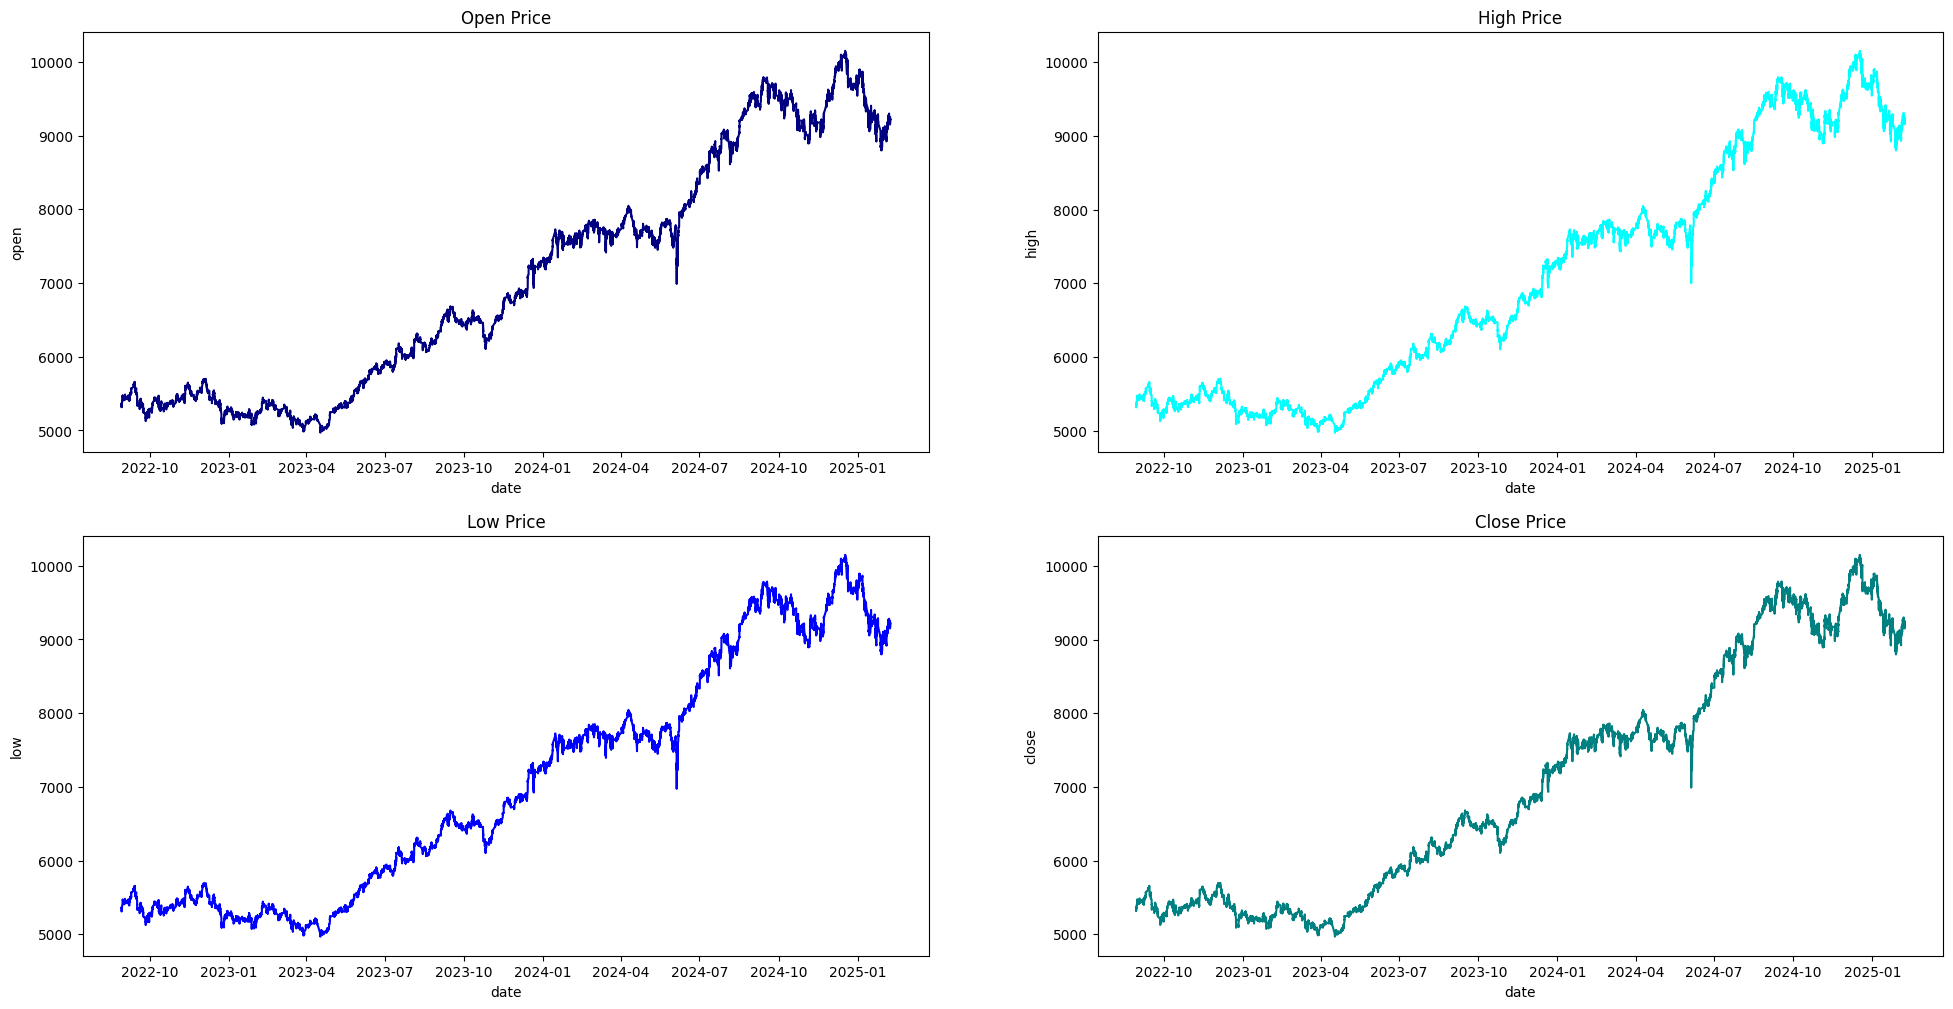

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(24, 12))
sns.lineplot(x="date", y="open", data=sales_data, color="navy", ax=axes[0, 0])
axes[0, 0].set_title("Open Price")

sns.lineplot(x="date", y="high", data=sales_data, color="aqua", ax=axes[0, 1])
axes[0, 1].set_title("High Price")

sns.lineplot(x="date", y="low", data=sales_data, color="blue", ax=axes[1, 0])
axes[1, 0].set_title("Low Price")

sns.lineplot(x="date", y="close", data=sales_data, color="teal", ax=axes[1, 1])
axes[1, 1].set_title("Close Price")

plt.show()

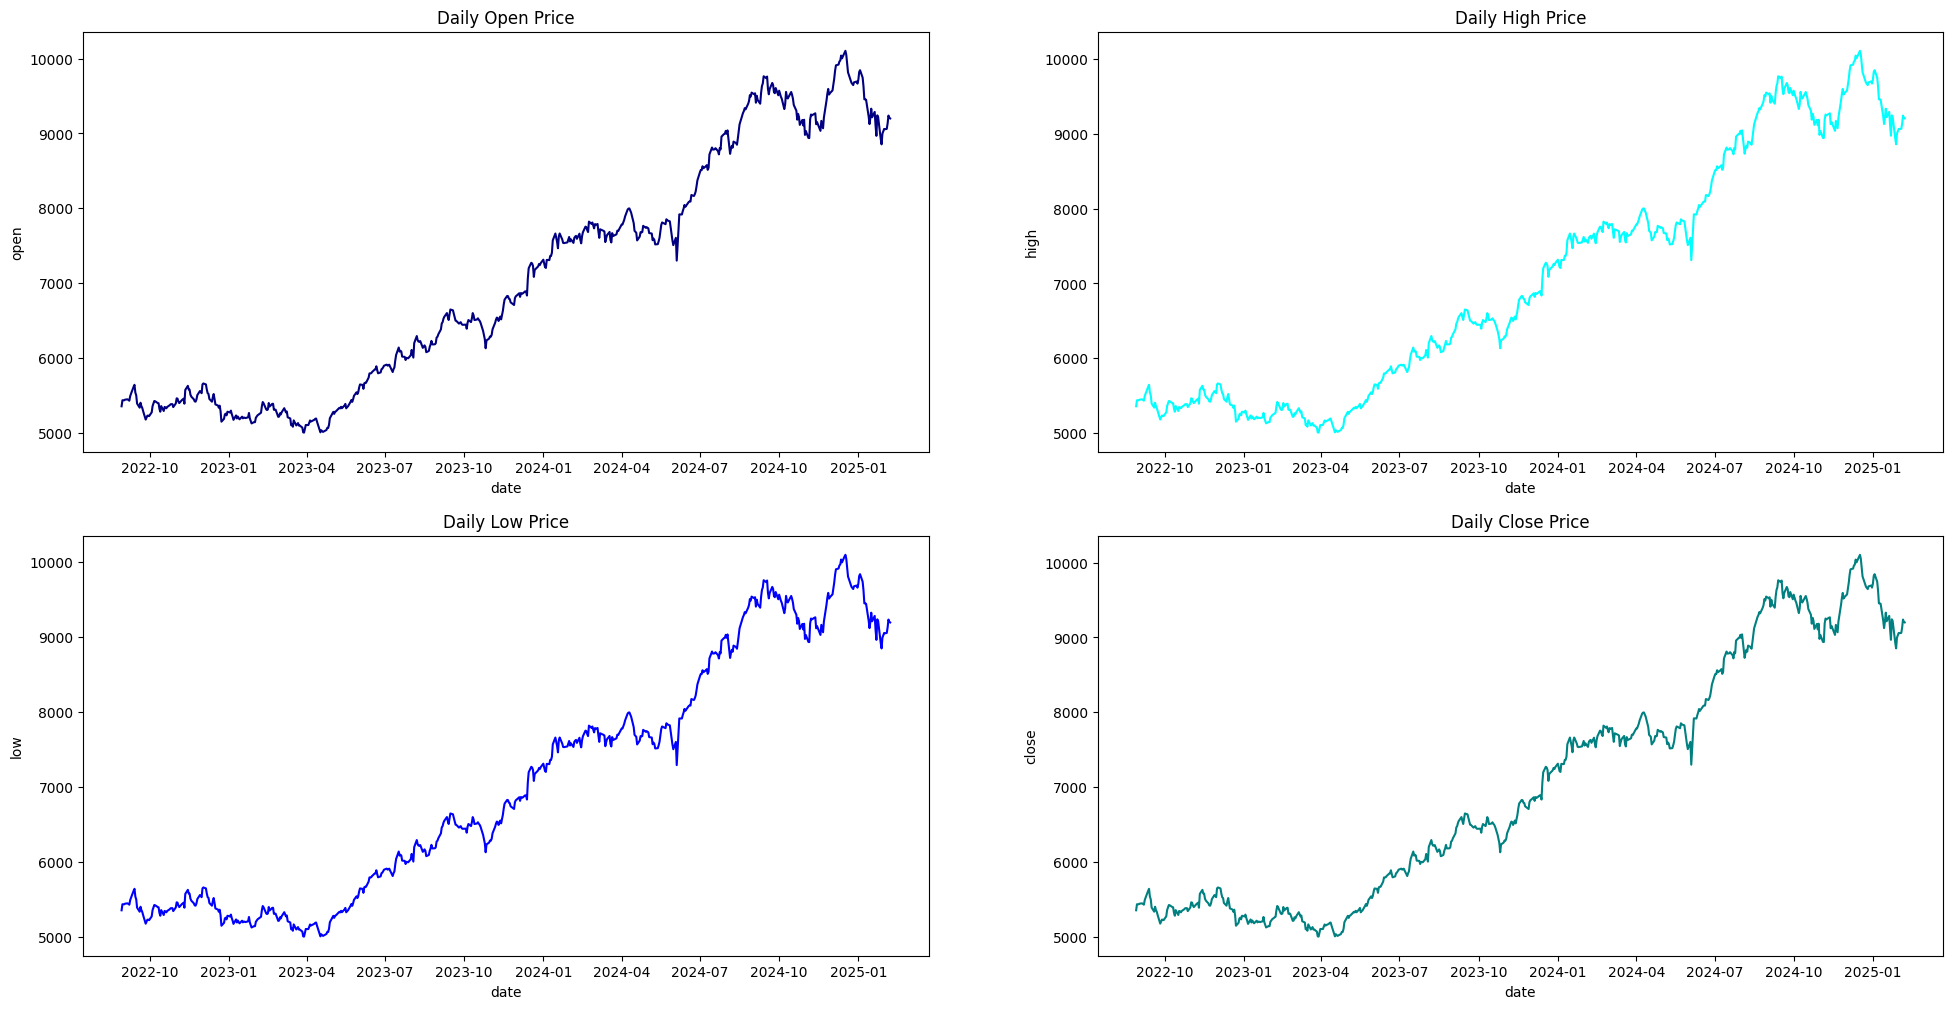

In [12]:
sales_data_daily = sales_data.set_index('date').resample('D').mean()

fig, axes = plt.subplots(2, 2, figsize=(24, 12))

sns.lineplot(x=sales_data_daily.index, y="open", data=sales_data_daily, color="navy", ax=axes[0, 0])
axes[0, 0].set_title("Daily Open Price")

sns.lineplot(x=sales_data_daily.index, y="high", data=sales_data_daily, color="aqua", ax=axes[0, 1])
axes[0, 1].set_title("Daily High Price")

sns.lineplot(x=sales_data_daily.index, y="low", data=sales_data_daily, color="blue", ax=axes[1, 0])
axes[1, 0].set_title("Daily Low Price")

sns.lineplot(x=sales_data_daily.index, y="close", data=sales_data_daily, color="teal", ax=axes[1, 1])
axes[1, 1].set_title("Daily Close Price")

plt.show()

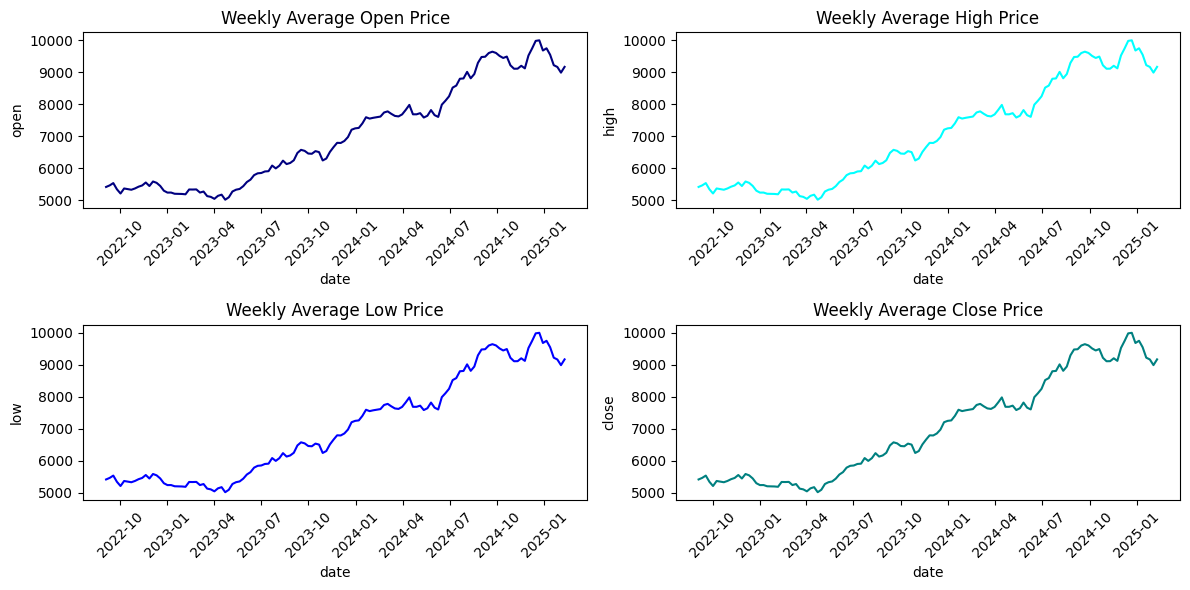

In [13]:
sales_data = sales_data.set_index('date')
weekly_data = sales_data.resample('W').mean()
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.lineplot(x=weekly_data.index, y=weekly_data["open"], data=weekly_data, color="navy", ax=axes[0, 0])
axes[0, 0].set_title("Weekly Average Open Price")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=weekly_data.index, y=weekly_data["high"], data=weekly_data, color="aqua", ax=axes[0, 1])
axes[0, 1].set_title("Weekly Average High Price")
axes[0, 1].tick_params(axis='x', rotation=45)

sns.lineplot(x=weekly_data.index, y=weekly_data["low"], data=weekly_data, color="blue", ax=axes[1, 0])
axes[1, 0].set_title("Weekly Average Low Price")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=weekly_data.index, y=weekly_data["close"], data=weekly_data, color="teal", ax=axes[1, 1])
axes[1, 1].set_title("Weekly Average Close Price")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-14-6d56ad3af317>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = sales_data.resample('M').mean()


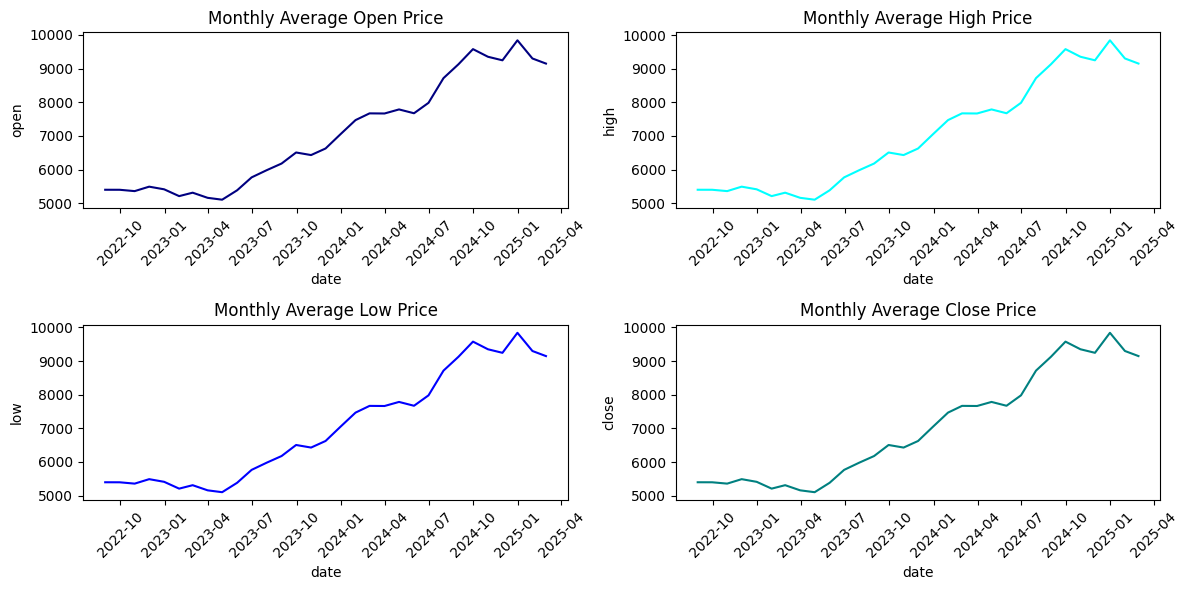

In [14]:
monthly_data = sales_data.resample('M').mean()

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.lineplot(x=monthly_data.index, y=monthly_data["open"], data=monthly_data, color="navy", ax=axes[0, 0])
axes[0, 0].set_title("Monthly Average Open Price")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=monthly_data.index, y=monthly_data["high"], data=monthly_data, color="aqua", ax=axes[0, 1])
axes[0, 1].set_title("Monthly Average High Price")
axes[0, 1].tick_params(axis='x', rotation=45)

sns.lineplot(x=monthly_data.index, y=monthly_data["low"], data=monthly_data, color="blue", ax=axes[1, 0])
axes[1, 0].set_title("Monthly Average Low Price")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=monthly_data.index, y=monthly_data["close"], data=monthly_data, color="teal", ax=axes[1, 1])
axes[1, 1].set_title("Monthly Average Close Price")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **D. Exploratory Data Analysis:**

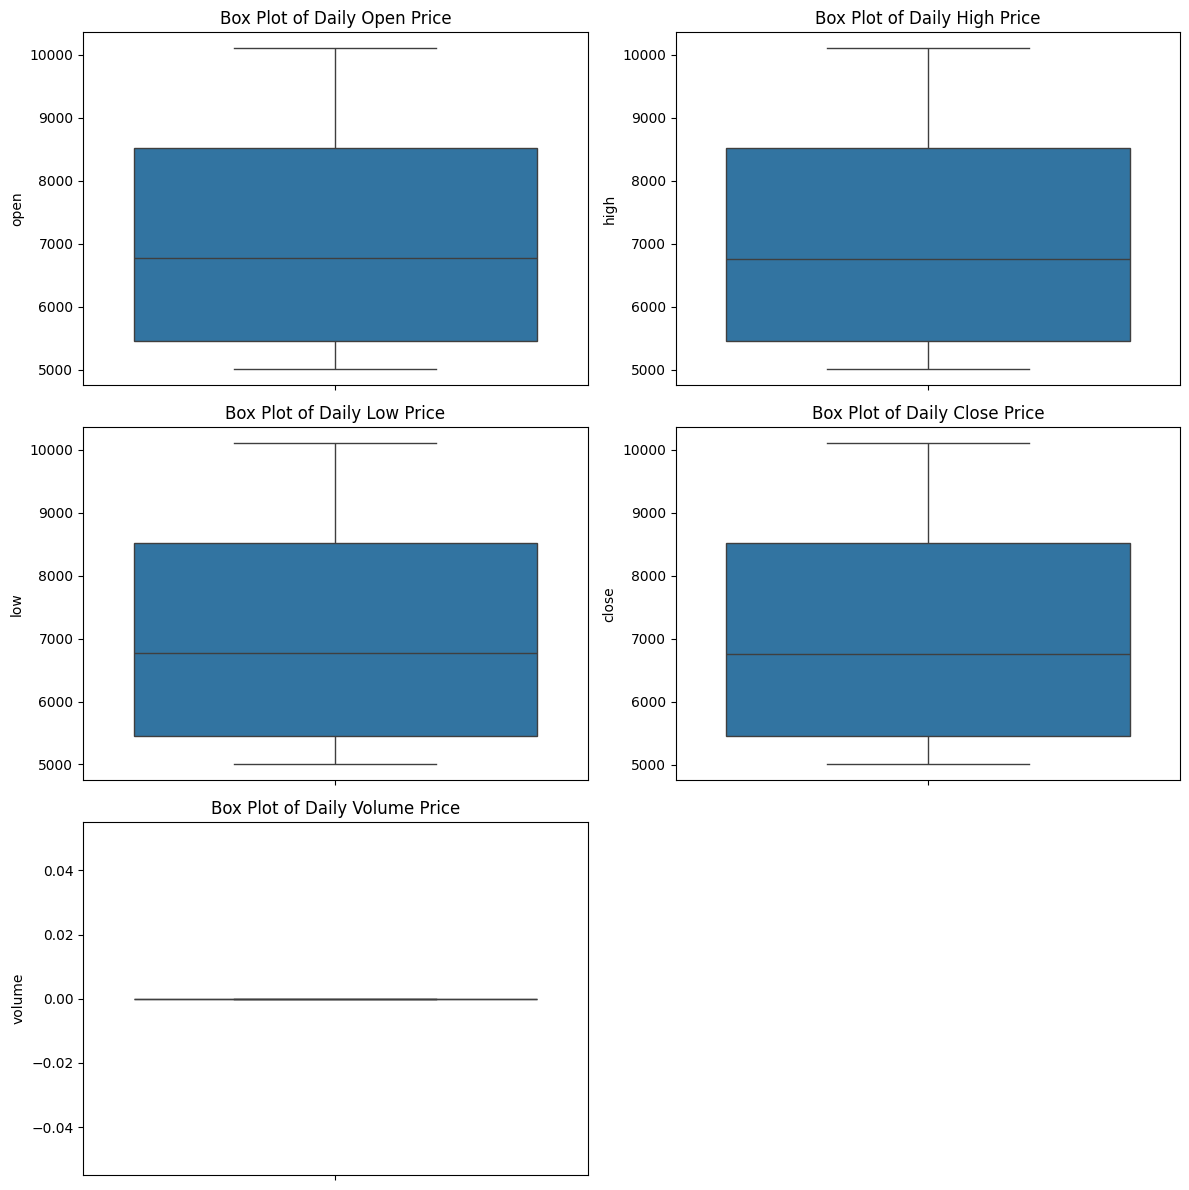

In [15]:
import math
daily_data = sales_data.resample('D').mean()

n_plots = daily_data.shape[1]
n_cols = 2
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), sharey=False)
axes_flat = axes.flatten()

for ax, (price_type, series) in zip(axes_flat, daily_data.items()):
    sns.boxplot(y=series, ax=ax)
    ax.set_title(f"Box Plot of Daily {price_type.capitalize()} Price")

for ax in axes_flat[n_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

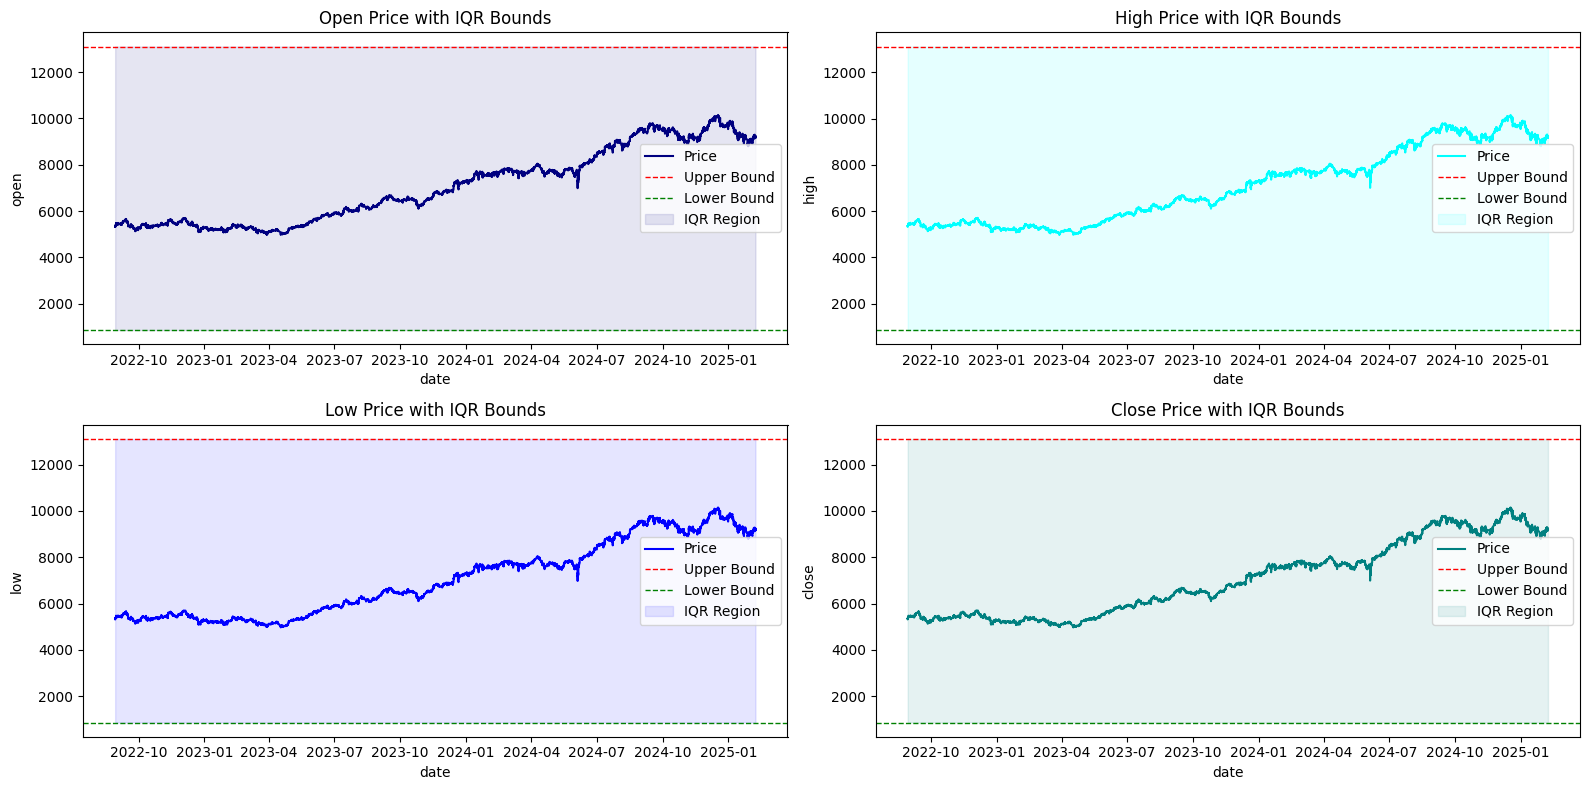

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
cols = ["open", "high", "low", "close"]
colors = ["navy", "aqua", "blue", "teal"]

for ax, col, color in zip(axes.flatten(), cols, colors):
    Q1 = sales_data[col].quantile(0.25)
    Q3 = sales_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    sns.lineplot(x=sales_data.index, y=col, data=sales_data, ax=ax, color=color, label="Price")

    ax.axhline(upper, color="red", linestyle="--", linewidth=1, label="Upper Bound")
    ax.axhline(lower, color="green", linestyle="--", linewidth=1, label="Lower Bound")

    ax.fill_between(sales_data.index, lower, upper, color=color, alpha=0.1, label="IQR Region")

    ax.set_title(f"{col.capitalize()} Price with IQR Bounds")
    ax.legend()

plt.tight_layout()
plt.show()

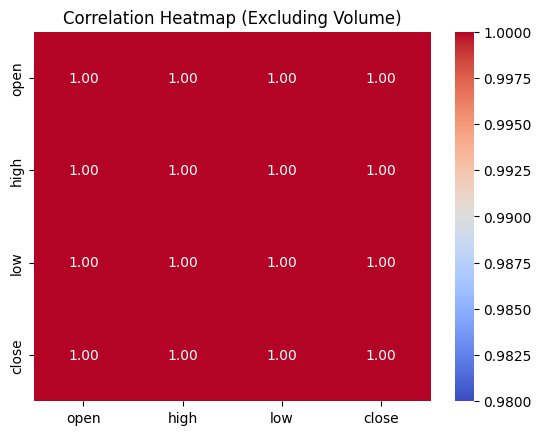

In [17]:
corr = sales_data[['open', 'high', 'low', 'close']].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=0.98, vmax=1.00)
plt.title('Correlation Heatmap (Excluding Volume)')
plt.show()

## **E. Time Series Analysis:**

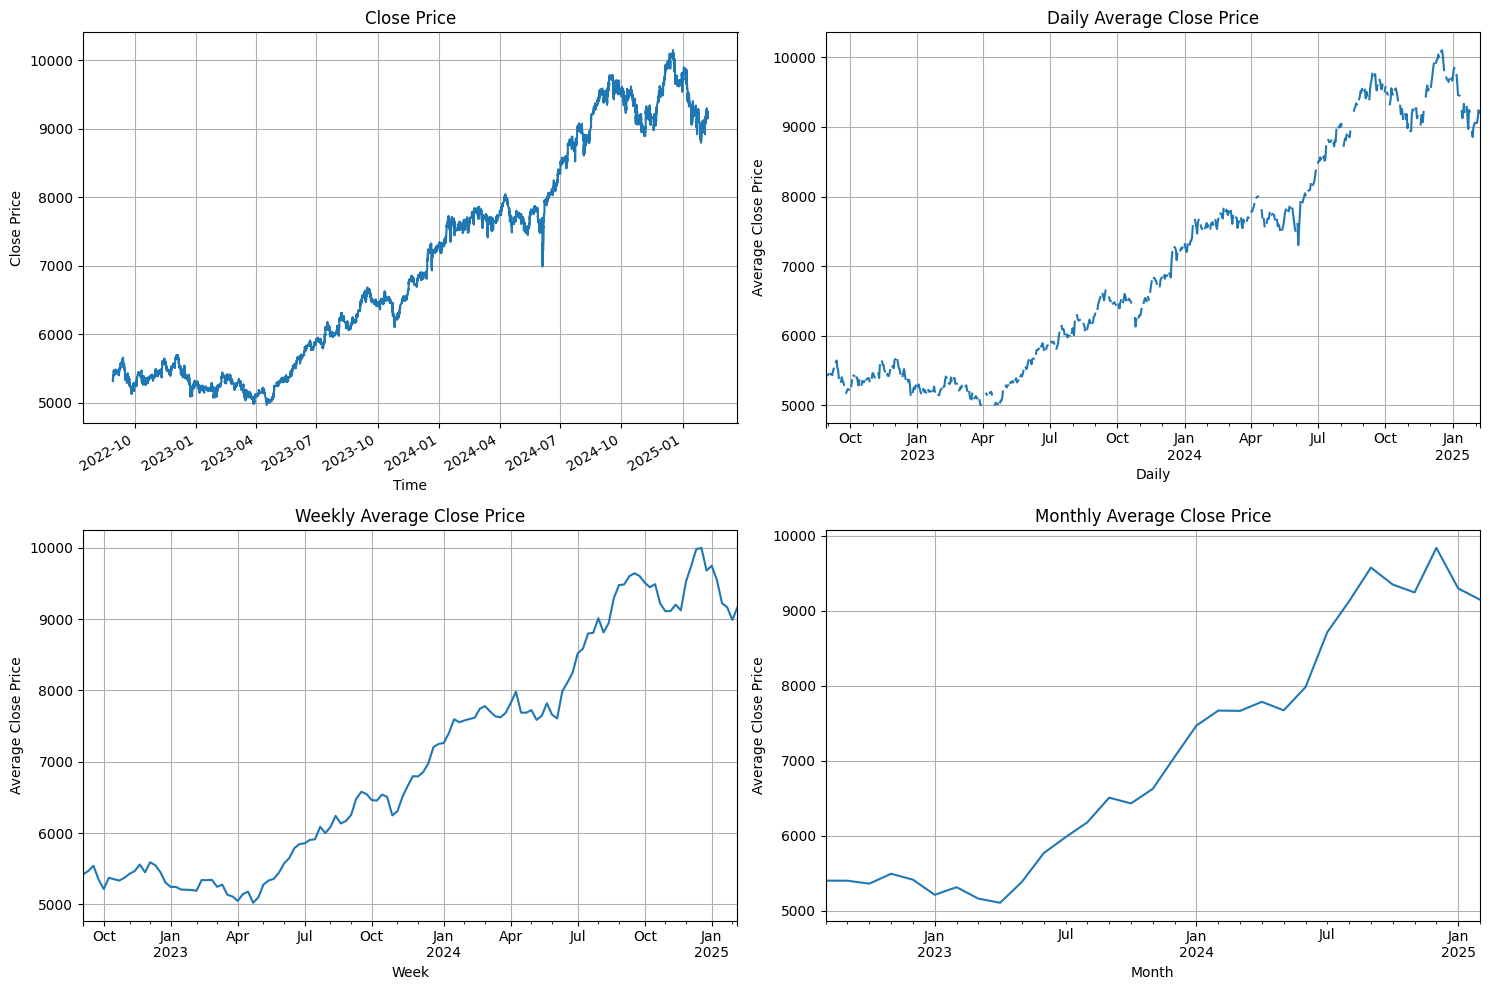

In [18]:
close_price = sales_data['close']

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
close_price.plot(title='Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)

plt.subplot(2, 2, 2)
daily_close = close_price.resample('D').mean()
daily_close.plot(title='Daily Average Close Price')
plt.xlabel('Daily')
plt.ylabel('Average Close Price')
plt.grid(True)

plt.subplot(2, 2, 3)
weekly_close = close_price.resample('W').mean()
weekly_close.plot(title='Weekly Average Close Price')
plt.xlabel('Week')
plt.ylabel('Average Close Price')
plt.grid(True)

plt.subplot(2, 2, 4)
monthly_close = close_price.resample('ME').mean()
monthly_close.plot(title='Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)

plt.tight_layout()
plt.show()

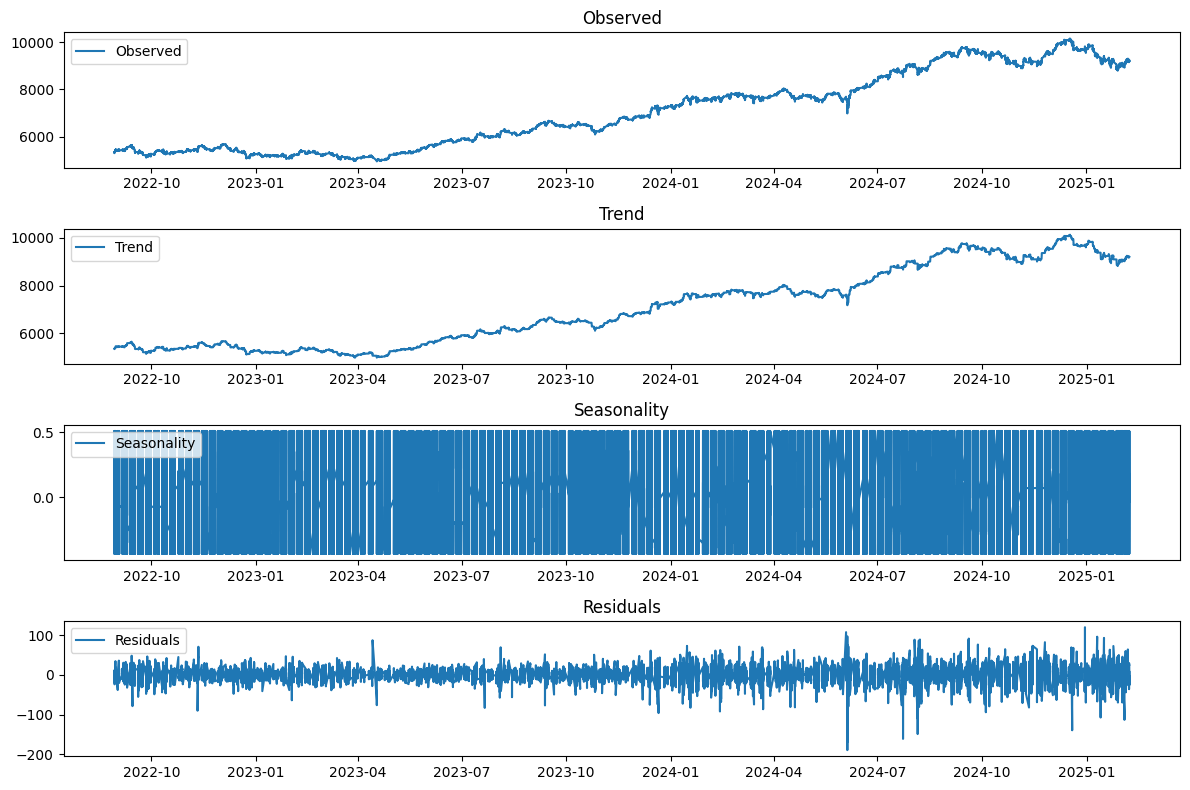

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(close_price, model='additive', period=100)

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(close_price, maxlag=10)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")

In [ ]:
close_price_diff = close_price.diff().dropna()

plt.figure(figsize=(15, 5))
plt.plot(close_price_diff)
plt.title('First Differenced Close Price')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

In [ ]:
result = adfuller(close_price_diff.dropna(), maxlag=10)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis")
    print("Reject the null hypothesis")
    print("Data has no unit root and is stationary")
else:
    print("Weak evidence against the null hypothesis")
    print("Fail to reject the null hypothesis")
    print("Data has a unit root and is non-stationary")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(close_price.dropna(), ax=axes[0], lags=60)
axes[0].set_title('ACF of Close Prices')

plot_pacf(close_price.dropna(), ax=axes[1], lags=60)
axes[1].set_title('PACF of Close Prices')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(close_price_diff.dropna(), ax=axes[0], lags=60)
axes[0].set_title('ACF of Differenced Close Prices')

plot_pacf(close_price_diff.dropna(), ax=axes[1], lags=60)
axes[1].set_title('PACF of Differenced Close Prices')

plt.tight_layout()
plt.show()

## **F.Model Fitting:**

### **Naive forecasting methods:**

In [ ]:
train_size = int(len(close_price) * 0.8)
train_data, test_data = close_price[:train_size], close_price[train_size:]

In [ ]:
train_series = pd.Series(train_data.values, index=train_data.index)
test_series = pd.Series(test_data.values, index=test_data.index)

naive_df = pd.DataFrame(index=test_series.index)
naive_df['Actual'] = test_series

naive_df['mean_prediction'] = train_series.mean()
naive_df['recent_mean'] = train_series[-500:].mean()
naive_df['last_value'] = train_series.iloc[-1]
naive_df['seasonal_naive'] = train_series[-len(test_series):].values

plt.figure(figsize=(14, 6))
plt.plot(train_series, label="Train")
plt.plot(naive_df['Actual'], label="Test")
plt.plot(naive_df['mean_prediction'], label="Mean Prediction")
plt.plot(naive_df['recent_mean'], label="Recent Mean")
plt.plot(naive_df['last_value'], label="Last Value")
plt.plot(naive_df['seasonal_naive'], label="Seasonal Naive")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Naive Forecasting Methods")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def calc_metrics(true, pred):
    rmse = math.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred)
    return rmse, mape
methods = ['Mean', 'Recent Mean', 'Last Value', 'Seasonal Naive']
rmse_values = []
mape_values = []

for col in ['mean_prediction', 'recent_mean', 'last_value', 'seasonal_naive']:
    rmse, mape = calc_metrics(naive_df['Actual'], naive_df[col])
    rmse_values.append(rmse)
    mape_values.append(mape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(methods, rmse_values, color='skyblue')
plt.title("RMSE - Naive Methods")
plt.ylabel("RMSE")
plt.grid(axis='y')
for bar, value in zip(bars_rmse, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
bars_mape = plt.bar(methods, [m * 100 for m in mape_values], color='salmon')
plt.title("MAPE (%) - Naive Methods")
plt.ylabel("MAPE (%)")
plt.grid(axis='y')
for bar, value in zip(bars_mape, mape_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{value * 100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **ARIMA models**

#### **MA**

In [ ]:
warnings.filterwarnings('ignore')

q_values = range(0, 6)

best_aic = float('inf')
best_order = None

results = []

for q in q_values:
    p = 0
    try:
        model = ARIMA(close_price_diff, order=(p, 0, q))
        model_fit = model.fit()
        aic = model_fit.aic
        results.append([p, 0, q, aic])
        print(f"ARIMA({p},0,{q}): AIC={aic}")
        if aic < best_aic:
            best_aic = aic
            best_order = (p, 0, q)
    except Exception as e:
        print(f"Error fitting ARIMA({p},0,{q}): {e}")
        results.append([p, 0, q, float('nan')])

print("\nResults Summary:")
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
print(results_df)

print(f"\nBest MA Order (ARIMA{best_order}): AIC = {best_aic}")

ARIMA(0,0,0): AIC=1233068.6447351635
ARIMA(0,0,1): AIC=1232890.377044505
ARIMA(0,0,2): AIC=1232889.3023144812
ARIMA(0,0,3): AIC=1232889.2338133124
ARIMA(0,0,4): AIC=1232877.003820759
ARIMA(0,0,5): AIC=1232878.4217881125

Results Summary:
   p  d  q           AIC
0  0  0  0  1.233069e+06
1  0  0  1  1.232890e+06
2  0  0  2  1.232889e+06
3  0  0  3  1.232889e+06
4  0  0  4  1.232877e+06
5  0  0  5  1.232878e+06

Best MA Order (ARIMA(0, 0, 4)): AIC = 1232877.003820759


In [ ]:
train_size_diff = int(len(close_price_diff) * 0.8)
train_data_diff, test_data_diff = close_price_diff[:train_size_diff], close_price_diff[train_size_diff:]

✅ RMSE: 488.4626
✅ MAPE: 4.00%


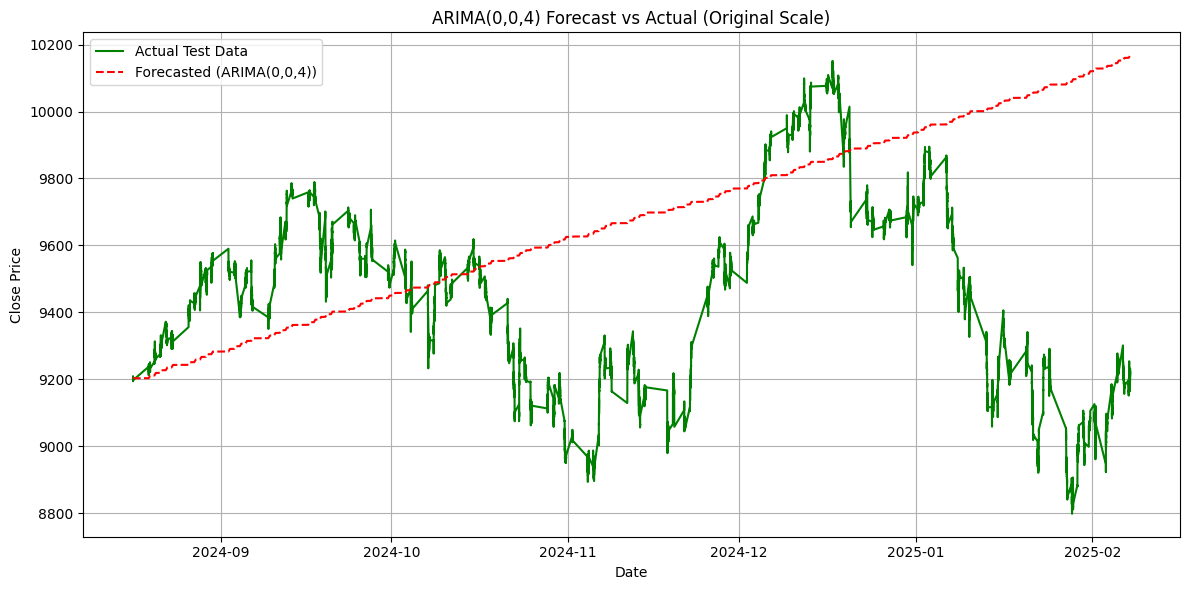

In [ ]:
warnings.filterwarnings('ignore')

p, d, q = 0, 0, 4
model = ARIMA(train_data_diff, order=(p, d, q))
model_fit = model.fit()

forecast_steps = len(test_data_diff)
forecast_diff = model_fit.forecast(steps=forecast_steps)

last_train_value = train_data.iloc[-1]
forecast_original = forecast_diff.cumsum() + last_train_value
forecast_original.index = test_data.index[:len(forecast_original)]

actual_original = test_data.iloc[:len(forecast_original)]

combined = pd.concat([actual_original, forecast_original], axis=1).dropna()
combined.columns = ['actual', 'forecast']

if combined.empty:
    print("⚠️ No overlapping data to evaluate! Check your forecast/test ranges.")
else:
    rmse = np.sqrt(mean_squared_error(combined['actual'], combined['forecast']))
    mape = mean_absolute_percentage_error(combined['actual'], combined['forecast']) * 100
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(combined.index, combined['actual'], label='Actual Test Data', color='green')
    plt.plot(combined.index, combined['forecast'], label=f'Forecasted (ARIMA({p},{d},{q}))', color='red', linestyle='--')
    plt.title(f'ARIMA({p},{d},{q}) Forecast vs Actual (Original Scale)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### **AR**

In [ ]:
p_values = range(1, 6)
best_aic = float('inf')
best_order = None
results = []

for p in p_values:
    try:
        model = ARIMA(close_price_diff, order=(p, 0, 0))
        model_fit = model.fit()
        aic = model_fit.aic
        results.append([p, 0, 0, aic])
        print(f"ARIMA({p},0,0): AIC={aic}")
        if aic < best_aic:
            best_aic = aic
            best_order = (p, 0, 0)
    except Exception as e:
        print(f"Error fitting ARIMA({p},0,0): {e}")
        results.append([p, 0, 0, float('nan')])

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
print("\nResults Summary:")
print(results_df)
print(f"\nBest AR Order (ARIMA{best_order}): AIC = {best_aic}")

ARIMA(1,0,0): AIC=1232891.88494587
ARIMA(2,0,0): AIC=1232888.9532663196
ARIMA(3,0,0): AIC=1232889.7199304432
ARIMA(4,0,0): AIC=1232877.1622936912
ARIMA(5,0,0): AIC=1232878.4008289734

Results Summary:
   p  d  q           AIC
0  1  0  0  1.232892e+06
1  2  0  0  1.232889e+06
2  3  0  0  1.232890e+06
3  4  0  0  1.232877e+06
4  5  0  0  1.232878e+06

Best AR Order (ARIMA(4, 0, 0)): AIC = 1232877.1622936912


✅ RMSE: 488.4652
✅ MAPE: 4.00%


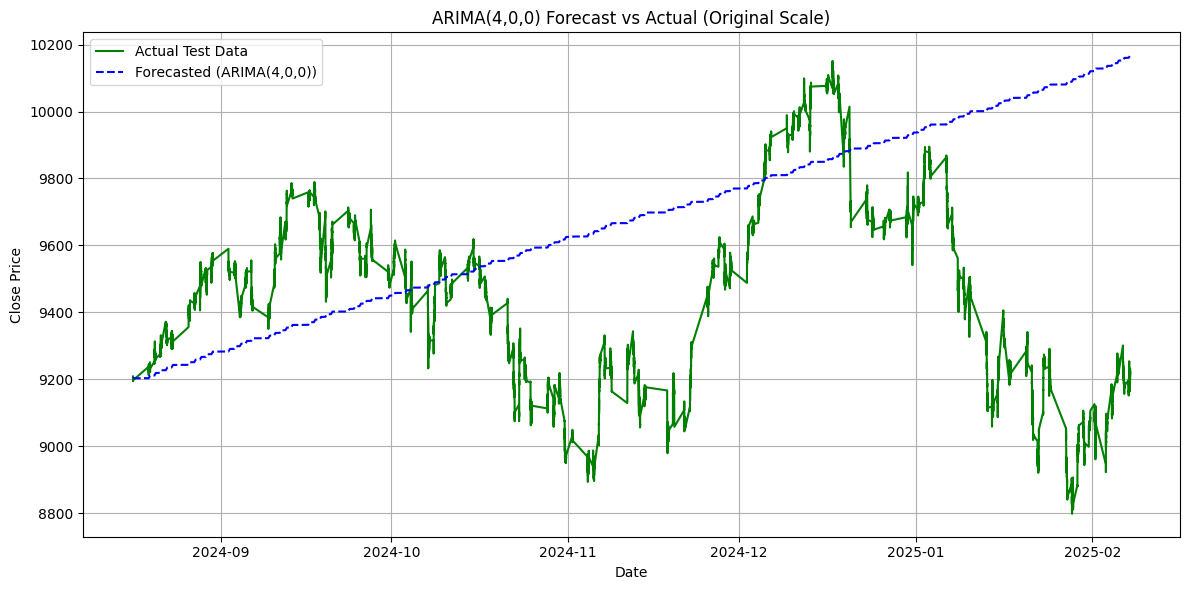

In [ ]:
p, d, q = best_order
model = ARIMA(train_data_diff, order=(p, d, q))
model_fit = model.fit()

forecast_steps = len(test_data_diff)
forecast_diff = model_fit.forecast(steps=forecast_steps)

last_train_value = train_data.iloc[-1]
forecast_original = forecast_diff.cumsum() + last_train_value
forecast_original.index = test_data.index[:len(forecast_original)]

actual_original = test_data.iloc[:len(forecast_original)]

combined = pd.concat([actual_original, forecast_original], axis=1).dropna()
combined.columns = ['actual', 'forecast']

if combined.empty:
    print("⚠️ No overlapping data to evaluate! Check your forecast/test ranges.")
else:
    rmse = np.sqrt(mean_squared_error(combined['actual'], combined['forecast']))
    mape = mean_absolute_percentage_error(combined['actual'], combined['forecast']) * 100
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(combined.index, combined['actual'], label='Actual Test Data', color='green')
    plt.plot(combined.index, combined['forecast'], label=f'Forecasted (ARIMA({p},{d},{q}))', color='blue', linestyle='--')
    plt.title(f'ARIMA({p},{d},{q}) Forecast vs Actual (Original Scale)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### **ARMA**

ARIMA(1,0,1) AIC: 947563.51
ARIMA(1,0,2) AIC: 947564.61
ARIMA(1,0,3) AIC: 947558.80
ARIMA(1,0,4) AIC: 947555.69
ARIMA(2,0,1) AIC: 947565.49
ARIMA(2,0,2) AIC: 947558.38
ARIMA(2,0,3) AIC: 947561.09
ARIMA(2,0,4) AIC: 947555.45
ARIMA(3,0,1) AIC: 947563.41
ARIMA(3,0,2) AIC: 947560.88
ARIMA(3,0,3) AIC: 947556.50
ARIMA(3,0,4) AIC: 947557.72
ARIMA(4,0,1) AIC: 947555.50
ARIMA(4,0,2) AIC: 947554.04
ARIMA(4,0,3) AIC: 947556.87
ARIMA(4,0,4) AIC: 947561.57

📋 AIC Results:
     p  d  q            AIC
0   1  0  1  947563.507992
1   1  0  2  947564.607095
2   1  0  3  947558.801471
3   1  0  4  947555.691585
4   2  0  1  947565.489232
5   2  0  2  947558.376403
6   2  0  3  947561.089036
7   2  0  4  947555.452037
8   3  0  1  947563.409377
9   3  0  2  947560.876627
10  3  0  3  947556.495018
11  3  0  4  947557.723550
12  4  0  1  947555.496857
13  4  0  2  947554.038025
14  4  0  3  947556.865524
15  4  0  4  947561.570129

✅ Best ARMA Order: ARIMA(4, 0, 2) with AIC = 947554.04

📊 RMSE: 488.4748
📊 

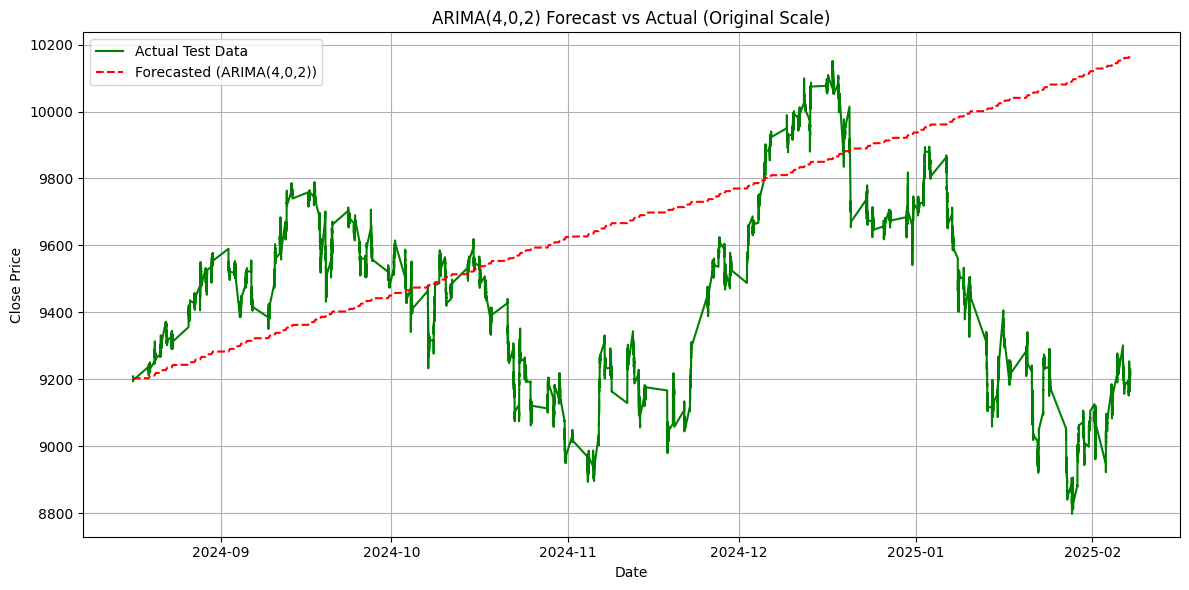

In [ ]:
warnings.filterwarnings('ignore')

best_aic = float('inf')
best_order = None
results = []

for p in range(1, 5):
    for q in range(1, 5):
        try:
            model = ARIMA(train_data_diff, order=(p, 0, q))
            model_fit = model.fit()
            aic = model_fit.aic
            results.append([p, 0, q, aic])
            print(f"ARIMA({p},0,{q}) AIC: {aic:.2f}")
            if aic < best_aic:
                best_aic = aic
                best_order = (p, 0, q)
        except Exception as e:
            print(f"Failed ARIMA({p},0,{q}): {e}")
            results.append([p, 0, q, float('nan')])

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
print("\n📋 AIC Results:\n", results_df)
print(f"\n✅ Best ARMA Order: ARIMA{best_order} with AIC = {best_aic:.2f}")

p, d, q = best_order
model = ARIMA(train_data_diff, order=(p, d, q))
model_fit = model.fit()

forecast_steps = len(test_data_diff)
forecast_diff = model_fit.forecast(steps=forecast_steps)

last_train_value = train_data.iloc[-1]
forecast_original = forecast_diff.cumsum() + last_train_value
forecast_original.index = test_data.index[:len(forecast_original)]

actual_original = test_data.iloc[:len(forecast_original)]

combined = pd.concat([actual_original, forecast_original], axis=1).dropna()
combined.columns = ['actual', 'forecast']

if combined.empty:
    print("⚠️ No overlapping data to evaluate! Check forecast/test ranges.")
else:
    rmse = np.sqrt(mean_squared_error(combined['actual'], combined['forecast']))
    mape = mean_absolute_percentage_error(combined['actual'], combined['forecast']) * 100
    print(f"\n📊 RMSE: {rmse:.4f}")
    print(f"📊 MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(combined.index, combined['actual'], label='Actual Test Data', color='green')
    plt.plot(combined.index, combined['forecast'], label=f'Forecasted (ARIMA({p},{d},{q}))', color='red', linestyle='--')
    plt.title(f'ARIMA({p},{d},{q}) Forecast vs Actual (Original Scale)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### **ARIMA**

ARIMA(1,1,1) AIC: 947564.54
ARIMA(1,1,2) AIC: 947565.64
ARIMA(1,1,3) AIC: 947560.02
ARIMA(1,1,4) AIC: 947556.65
ARIMA(2,1,1) AIC: 947566.52
ARIMA(2,1,2) AIC: 947559.49
ARIMA(2,1,3) AIC: 947562.32
ARIMA(2,1,4) AIC: 947556.28
ARIMA(3,1,1) AIC: 947564.51
ARIMA(3,1,2) AIC: 947562.10
ARIMA(3,1,3) AIC: 947557.23
ARIMA(3,1,4) AIC: 947558.61
ARIMA(4,1,1) AIC: 947556.49
ARIMA(4,1,2) AIC: 947554.82
ARIMA(4,1,3) AIC: 947557.70
ARIMA(4,1,4) AIC: 947562.35

📋 AIC Summary:
     p  d  q            AIC
0   1  1  1  947564.535412
1   1  1  2  947565.642687
2   1  1  3  947560.019002
3   1  1  4  947556.651116
4   2  1  1  947566.519477
5   2  1  2  947559.493863
6   2  1  3  947562.319814
7   2  1  4  947556.278167
8   3  1  1  947564.509713
9   3  1  2  947562.099694
10  3  1  3  947557.230838
11  3  1  4  947558.613509
12  4  1  1  947556.486062
13  4  1  2  947554.815776
14  4  1  3  947557.700175
15  4  1  4  947562.351013

✅ Best ARIMA Order: ARIMA(4, 1, 2) with AIC = 947554.82

📊 RMSE: 373.0126
📊

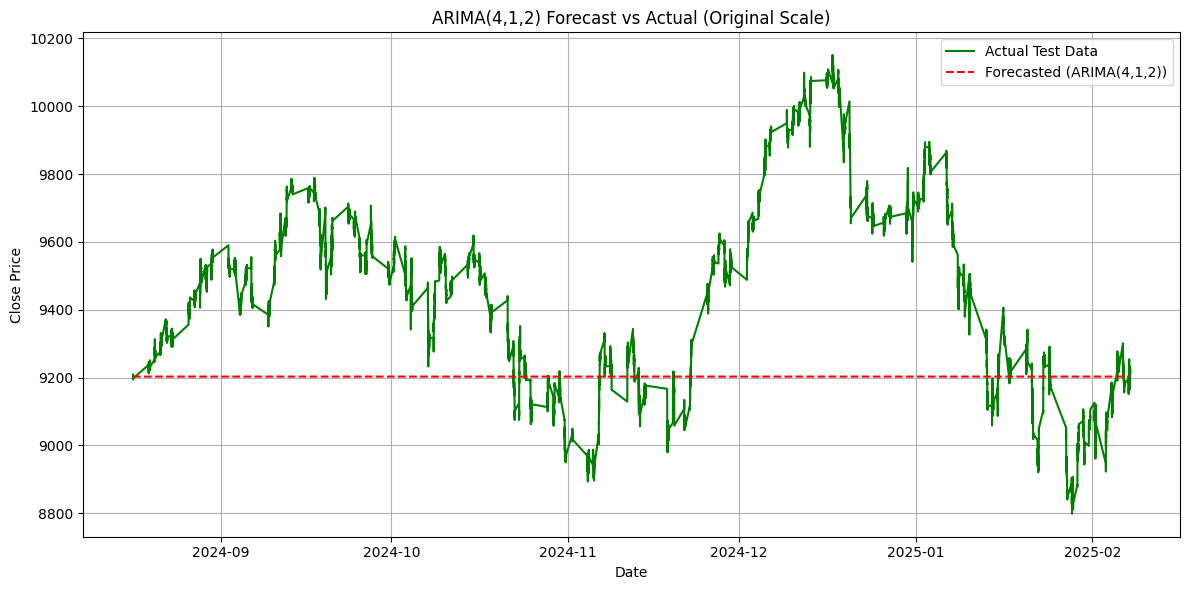

In [ ]:
warnings.filterwarnings('ignore')

best_aic = float('inf')
best_order = None
results = []
d=1

for p in range(1, 5):
        for q in range(1, 5):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                results.append([p, d, q, aic])
                print(f"ARIMA({p},{d},{q}) AIC: {aic:.2f}")
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except Exception as e:
                print(f"❌ ARIMA({p},{d},{q}) failed: {e}")
                results.append([p, d, q, float('nan')])

results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC'])
print("\n📋 AIC Summary:\n", results_df)
print(f"\n✅ Best ARIMA Order: ARIMA{best_order} with AIC = {best_aic:.2f}")

p, d, q = best_order
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)
forecast.index = test_data.index[:len(forecast)]

combined = pd.concat([test_data[:len(forecast)], forecast], axis=1).dropna()
combined.columns = ['actual', 'forecast']

if combined.empty:
    print("⚠️ No overlapping data to evaluate!")
else:
    rmse = np.sqrt(mean_squared_error(combined['actual'], combined['forecast']))
    mape = mean_absolute_percentage_error(combined['actual'], combined['forecast']) * 100
    print(f"\n📊 RMSE: {rmse:.4f}")
    print(f"📊 MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(combined.index, combined['actual'], label='Actual Test Data', color='green')
    plt.plot(combined.index, combined['forecast'], label=f'Forecasted (ARIMA({p},{d},{q}))', color='red', linestyle='--')
    plt.title(f'ARIMA({p},{d},{q}) Forecast vs Actual (Original Scale)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

RMSE: 373.0878
MAPE: 3.10%


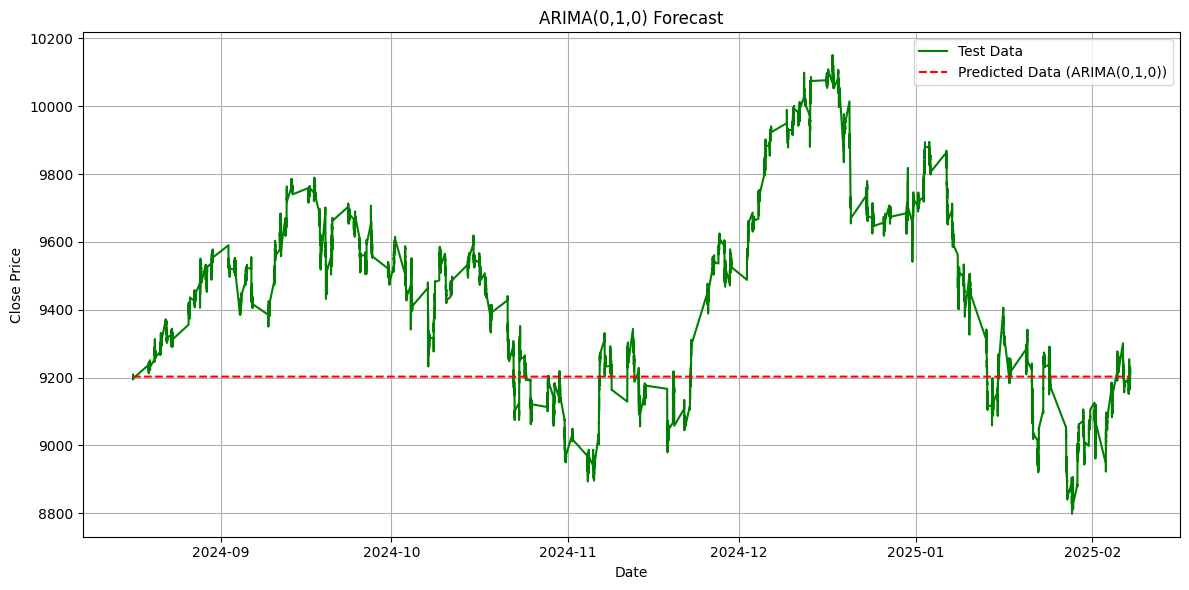

In [ ]:
warnings.filterwarnings('ignore')

model = ARIMA(train_data.values, order=(0, 1, 0))
model_fit = model.fit()

forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

rmse = np.sqrt(mean_squared_error(test_data.values, forecast))
mape = mean_absolute_percentage_error(test_data.values, forecast) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Test Data', color='green')
plt.plot(test_data.index, forecast, label='Predicted Data (ARIMA(0,1,0))', color='red', linestyle='--')
plt.title('ARIMA(0,1,0) Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **SARIMA**


🔍 Sample Size: 227246
✅ RMSE: 490.9804
✅ MAPE: 4.02%


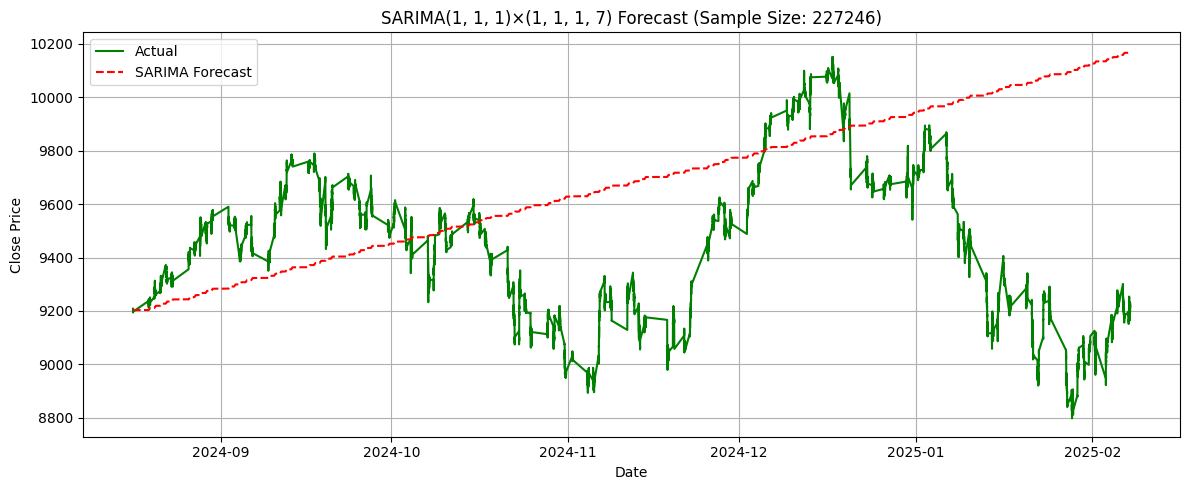

In [40]:
warnings.filterwarnings('ignore')

sample_sizes = [len(close_price)]
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)

for size in sample_sizes:
    print(f"\n🔍 Sample Size: {size}")

    close_price_sample = close_price[-size:]

    train_size = int(len(close_price_sample) * 0.8)
    train_data = close_price_sample[:train_size]
    test_data  = close_price_sample[train_size:]

    model = SARIMAX(
        train_data,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    model_fit = model.fit(disp=False)

    forecast = model_fit.forecast(steps=len(test_data))
    forecast.index = test_data.index

    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    mape = mean_absolute_percentage_error(test_data, forecast) * 100
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 5))
    plt.plot(test_data.index, test_data, label="Actual", color='green')
    plt.plot(test_data.index, forecast, label="SARIMA Forecast", color='red', linestyle='--')
    plt.title(f"SARIMA{order}×{seasonal_order} Forecast (Sample Size: {size})")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    del model, model_fit
    gc.collect()

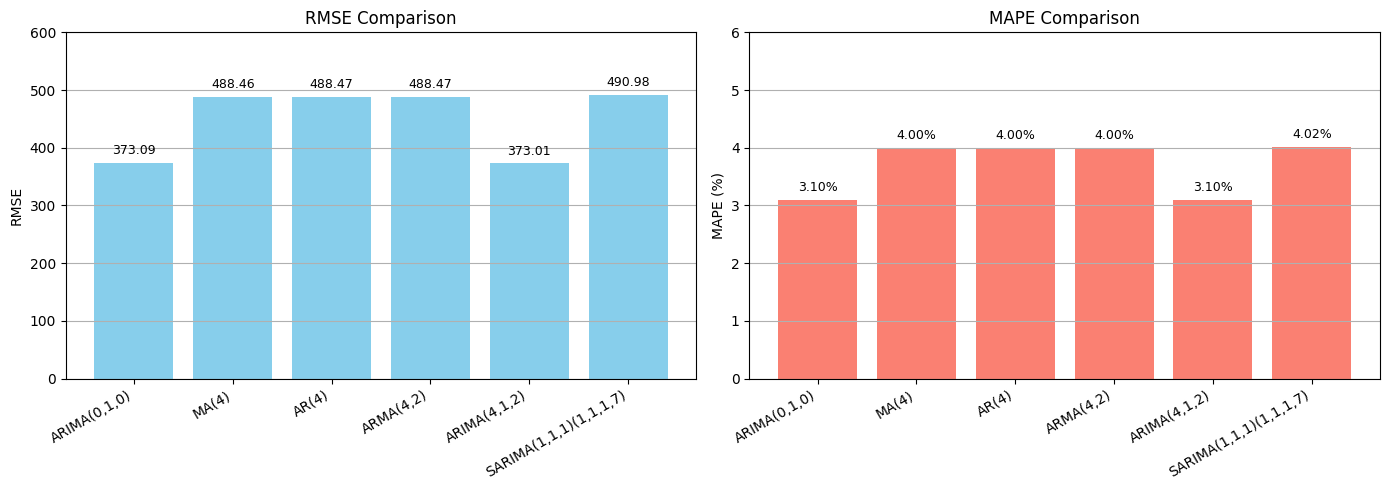

In [15]:
model_names = [
    'ARIMA(0,1,0)',
    'MA(4)',
    'AR(4)',
    'ARMA(4,2)',
    'ARIMA(4,1,2)',
    'SARIMA(1,1,1)(1,1,1,7)'
]

rmses = [373.0878, 488.4626, 488.4652, 488.4748, 373.0126, 490.9804]
mapes = [3.10, 4.00, 4.00, 4.00, 3.10, 4.02]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(model_names, rmses, color='skyblue')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 600)
plt.grid(axis='y')

for bar in bars_rmse:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 10, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.subplot(1, 2, 2)
bars_mape = plt.bar(model_names, mapes, color='salmon')
plt.title("MAPE Comparison")
plt.ylabel("MAPE (%)")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 6)
plt.grid(axis='y')

for bar in bars_mape:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.1, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### **Deep Nueral Networks**

Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.0021 - val_loss: 1.1259e-04
Epoch 2/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 3.4695e-06 - val_loss: 2.7945e-05
Epoch 3/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 3.8151e-06 - val_loss: 2.8725e-05
Epoch 4/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 3.2248e-06 - val_loss: 4.1223e-06
Epoch 5/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 2.3250e-06 - val_loss: 5.3428e-06
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


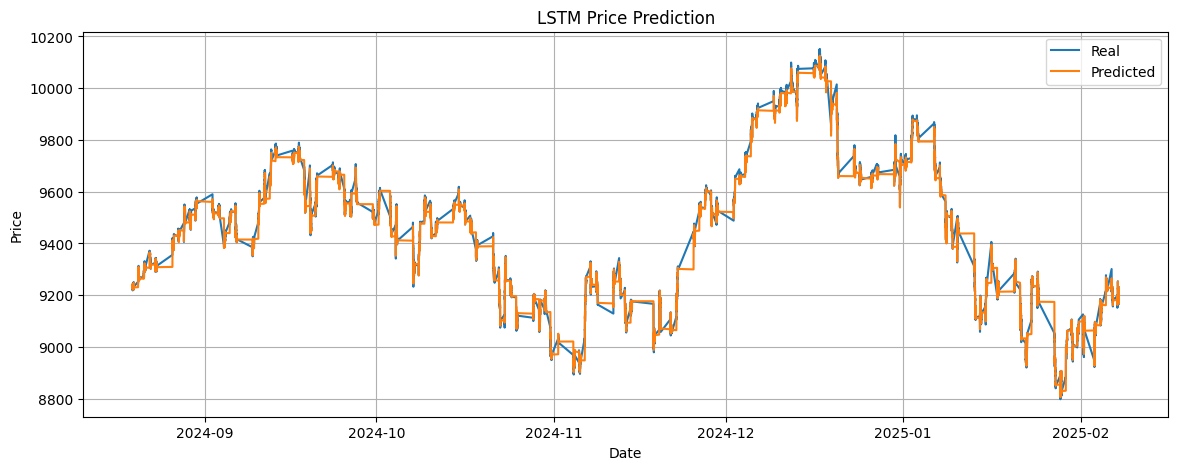

In [ ]:
data = sales_data['close'].values.reshape(-1, 1)

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

def create_sequences(data, seq_len=50):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

predictions = lstm_model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

date_range = sales_data.index[train_size + 50:]

plt.figure(figsize=(14, 5))
plt.plot(date_range, real_prices, label="Real")
plt.plot(date_range, predicted_prices, label="Predicted")
plt.title("LSTM Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 0.0033 - val_loss: 3.3371e-05
Epoch 2/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 1.3734e-06 - val_loss: 3.1922e-05
Epoch 3/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1.8530e-06 - val_loss: 1.8755e-05
Epoch 4/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.9559e-06 - val_loss: 5.5571e-06
Epoch 5/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1.6379e-06 - val_loss: 2.3915e-05
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


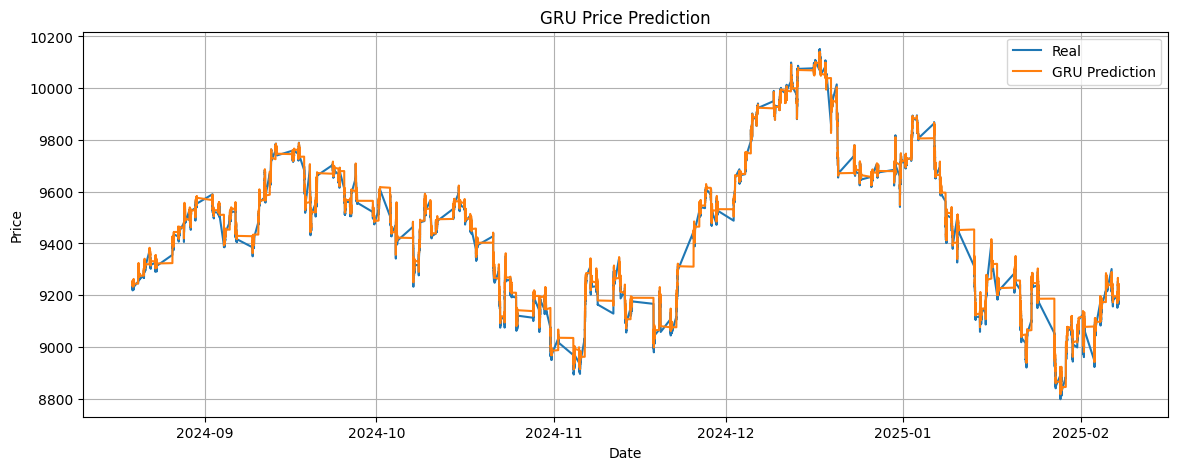

In [ ]:
gru_model = Sequential([
    GRU(64, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

gru_predictions = gru_model.predict(X_test)
gru_predicted_prices = scaler.inverse_transform(gru_predictions)

plt.figure(figsize=(14, 5))
plt.plot(date_range, real_prices, label="Real")
plt.plot(date_range, gru_predicted_prices, label="GRU Prediction")
plt.title("GRU Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 9.8992e-04 - val_loss: 4.5593e-04
Epoch 2/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - loss: 2.8379e-06 - val_loss: 1.9251e-04
Epoch 3/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 3.0871e-06 - val_loss: 8.5716e-05
Epoch 4/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 2.2702e-06 - val_loss: 3.3193e-05
Epoch 5/5
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.6549e-06 - val_loss: 9.8135e-06
1419/1419 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


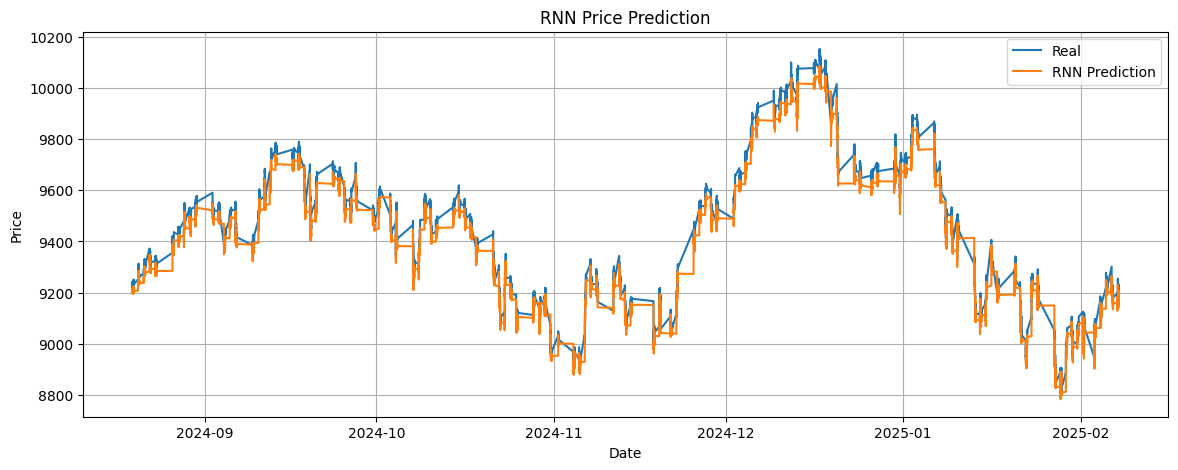

In [ ]:
rnn_model = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

rnn_predictions = rnn_model.predict(X_test)
rnn_predicted_prices = scaler.inverse_transform(rnn_predictions)

plt.figure(figsize=(14, 5))
plt.plot(date_range, real_prices, label="Real")
plt.plot(date_range, rnn_predicted_prices, label="RNN Prediction")
plt.title("RNN Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def evaluate_model(name, real, predicted):
    rmse = math.sqrt(mean_squared_error(real, predicted))
    mape = mean_absolute_percentage_error(real, predicted) * 100
    print(f"📊 {name}")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAPE: {mape:.2f}%\n")

evaluate_model("LSTM", real_prices, predicted_prices)
evaluate_model("GRU", real_prices, gru_predicted_prices)
evaluate_model("RNN", real_prices, rnn_predicted_prices)

📊 LSTM
   ✅ RMSE: 10.2930
   ✅ MAPE: 0.08%

📊 GRU
   ✅ RMSE: 11.9236
   ✅ MAPE: 0.11%

📊 RNN
   ✅ RMSE: 34.5853
   ✅ MAPE: 0.34%



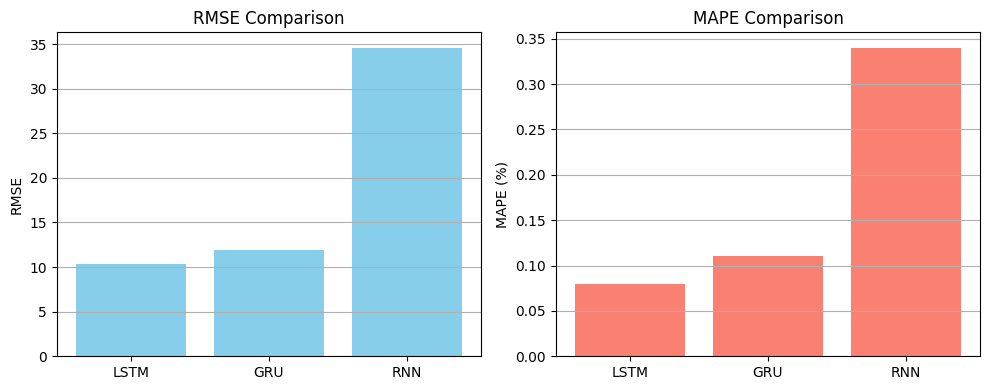

In [ ]:
model_names = ['LSTM', 'GRU', 'RNN']
rmses = [10.2930, 11.9236, 34.5853]
mapes = [0.08, 0.11, 0.34]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(model_names, rmses, color='skyblue')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(model_names, mapes, color='salmon')
plt.title("MAPE Comparison")
plt.ylabel("MAPE (%)")
plt.grid(axis='y')

plt.tight_layout()
plt.show()